Setup 

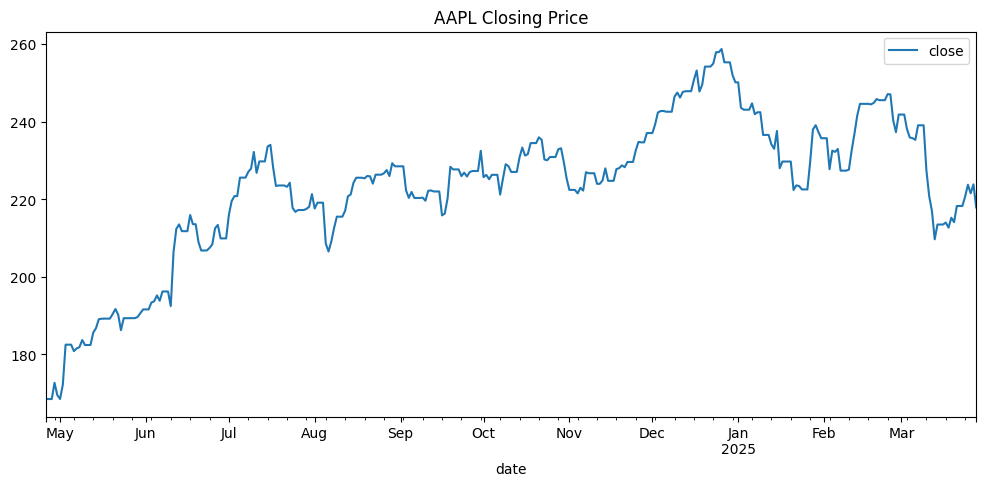

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import joblib
import os 

df = pd.read_parquet("../data/processed/model_ready.parquet")
aapl = df[df['ticker'] == 'AAPL'][['close']]  

# Plot to verify
aapl.plot(title='AAPL Closing Price', figsize=(12, 5))
plt.show()

Check Stationarity

ADF p-value: 0.037377809146013456


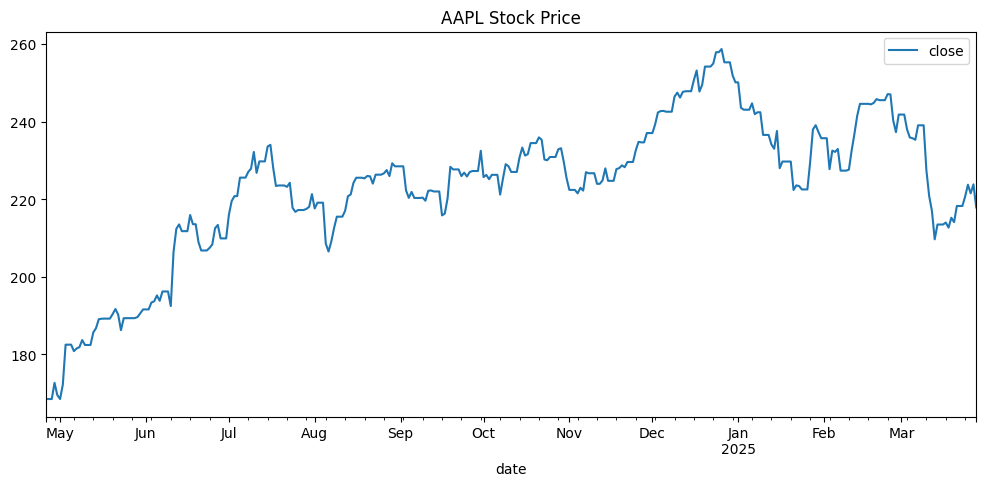

In [ ]:
# Augmented Dickey-Fuller test
result = adfuller(aapl['close'])
print('ADF p-value:', result[1])  # If >0.05, difference the data

aapl.plot(title='AAPL Stock Price', figsize=(12, 5))
plt.show()

If p-value > 0.05: Data is non-stationary → difference it:

<Axes: title={'center': 'Differenced AAPL Price'}, xlabel='date'>

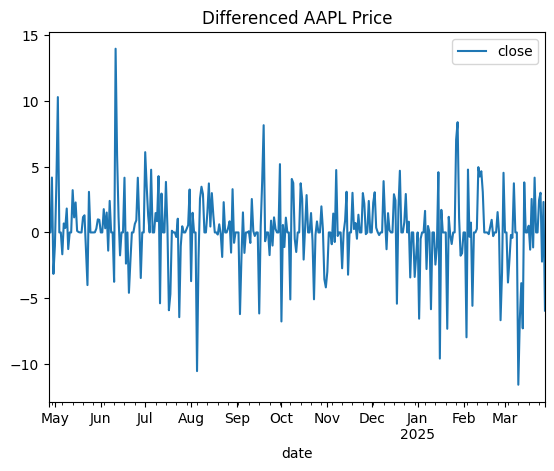

In [18]:
aapl_diff = aapl.diff().dropna()  # 1st-order differencing
aapl_diff.plot(title='Differenced AAPL Price')

Train ARIMA Model

Starting with simple parameters (order=(5,1,0)):

In [19]:
model = ARIMA(aapl['close'], order=(5,1,0))  # (p,d,q)
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  337
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -825.561
Date:                Mon, 31 Mar 2025   AIC                           1663.122
Time:                        03:10:09   BIC                           1686.024
Sample:                    04-26-2024   HQIC                          1672.251
                         - 03-28-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0778      0.044      1.761      0.078      -0.009       0.164
ar.L2         -0.0087      0.074     -0.117      0.907      -0.155       0.137
ar.L3         -0.0670      0.057     -1.183      0.2

C:\Users\Alaa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Alaa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Alaa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 Validate Predictions

C:\Users\Alaa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Alaa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Alaa\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


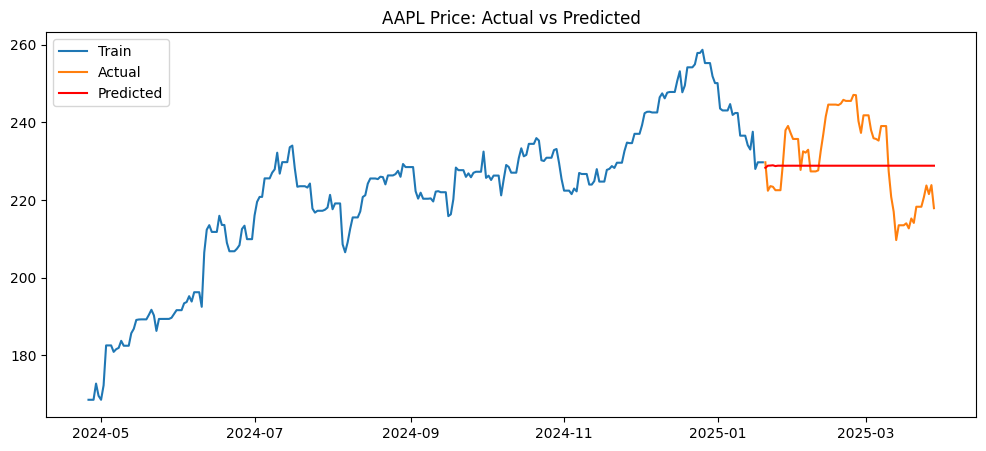

In [20]:
# Split data (80% train, 20% test)
train = aapl.iloc[:int(0.8*len(aapl))]
test = aapl.iloc[int(0.8*len(aapl)):]

# Train on 80%, forecast next 20%
model = ARIMA(train['close'], order=(5,1,0)).fit()
forecast = model.forecast(steps=len(test))

# Plot predictions vs actual
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['close'], label='Train')
plt.plot(test.index, test['close'], label='Actual')
plt.plot(test.index, forecast, label='Predicted', color='red')
plt.legend()
plt.title('AAPL Price: Actual vs Predicted')
plt.show()

In [ ]:
os.makedirs("../src/models", exist_ok=True)
joblib.dump(fitted_model, "../src/models/arima_aapl.pkl")
print("Model saved to ../src/models/arima_aapl.pkl")

Model saved to ../src/models/arima_aapl.pkl
